In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
from math import *
from math import sqrt

In [12]:
# Unidades MKS
m = 1
cm = 0.01*m
mm = 0.001*m

kgf = 1
tnf = 1000*kgf

inch = 2.54*cm

In [13]:
class Escalera():
    def __init__(self, CP, P, Lt, e1, e2, Ld, sc, fc, fy, apoyos):
        self.CP = CP
        self.P = P
        self.Lt = Lt
        self.e1 = e1
        self.e2 = e2
        self.Ld = Ld
        self.sc = sc
        self.fc = fc
        self.fy = fy
        self.apoyos = apoyos
        
    def area(self, db):
        '''
        Determina el area del acero longitudinal segun su numero de barra
        '''
        if db == 2:
            As = 0.32*cm**2
        elif db == 3:
            As = 0.71*cm**2
        elif db == 4:
            As = 1.27*cm**2
        elif db == 5:
            As = 1.98*cm**2
        elif db == 6:
            As = 2.84*cm**2
        elif db == 8:
            As = 5.10*cm**2
        else:
            As = 0.00
        return As
    
    def beta(self, fc):
        if 175*kgf/cm**2 <= fc <= 280*kgf/cm**2:
            beta = 0.85
        elif 280*kgf/cm**2 < fc < 550*kgf/cm**2:
            beta = 0.85 - 0.05*(fc-280*kgf/cm**2)/(70*kgf/cm**2)
        elif fc > 550*kgf/cm**2:
            beta = 0.65
        return beta
    
    def alfa(self, apoyos):
        if apoyos =="Muros de Albañileria" or apoyos == "Vigas Chatas" or apoyos == "Losas":
            alfa = 1
        elif apoyos == "Vigas Peraltadas":
            alfa = 0.9
        elif apoyos == "Muros Concreto Armado":
            alfa = 0.8
        return alfa
    
    def Espesor(self, Lt, e1, e2):
        t1 = (Lt-(e1+e2)/2)/25
        # Redondear al multiplo mas cercano de 2.5cm
        t = math.floor(t1/0.025)*2.5*cm+2.5*cm
        return t

    # Metrado de cargas Wu1 y Wu2
    def Metrado(self, CP, P, sc, t):
        Cos = P/sqrt(CP**2+P**2) 
        ho = t/Cos
        hm = ho+CP/2
        PP1 = 1.4*hm*2.4*tnf/m**2
        PT = 1.4*0.1*tnf/m
        SC = 1.7*sc*1*m
        Wu1 = PP1+PT+SC
        PP2 = 1.4*t*2.4*tnf/m**2
        PT = 1.4*0.1*tnf/m
        SC = 1.7*sc*1*m
        Wu2 = PP2+PT+SC
        return Wu1, Wu2

    def Reaccion_A(self, Lt, Ld, e2, Wu1, Wu2):
        Ra = (0.5*Wu1*(Lt-Ld-0.5*e2)*(Lt+Ld+0.5*e2)+0.5*Wu2*(Ld+0.5*e2)**2)/Lt
        xmax = Ra/Wu1
        Mmax_pos = 0.5*Wu1*xmax**2
        return Mmax_pos
    
    def Momento_Aceros(self, Mmax_pos, t, alfa, fc, fy, beta):
        phi = 0.9
        d = t-3*cm
        b = 1*m
        #Momento positivo
        Mdis_pos = alfa*Mmax_pos
        a_pos = d-sqrt(d**2-(2*Mdis_pos)/(phi*beta*fc*b))
        As_pos = beta*fc*a_pos*b/fy
        #Momento negativo
        Mdis_neg=0.5*Mdis_pos
        a_neg= d-sqrt(d**2-(2*Mdis_neg)/(phi*beta*fc*b))
        As_neg=beta*fc*a_neg*b/fy
        #Acero transversal
        Asmin_trans = 0.0018*b*t
        return As_pos, As_neg, Asmin_trans
    
    def Espaciamientos(self, As_pos, As_neg, Asmin_trans):
        #Espaciamiento positivo
        e_pos = math.floor((self.area(4)/As_pos)*m/0.05)*5*cm
        #Espaciamiento negativo
        e_neg = math.floor((self.area(3)/As_neg)*m/0.05)*5*cm
        #Espaciamiento transversal
        e_trans = math.floor((self.area(3)/Asmin_trans)*m/0.05)*5*cm
        return e_pos, e_neg, e_trans 
        
    def graficar_escalera(self):
        """Método para graficar la escalera con el refuerzo - DESCANSO A LA DERECHA"""
        fig, ax = plt.subplots(figsize=(14, 8))
        
        # Calcular dimensiones y valores necesarios
        t = self.Espesor(self.Lt, self.e1, self.e2)
        Wu1, Wu2 = self.Metrado(self.CP, self.P, self.sc, t)
        Mmax_pos = self.Reaccion_A(self.Lt, self.Ld, self.e2, Wu1, Wu2)
        alfa_val = self.alfa(self.apoyos)
        beta_val = self.beta(self.fc)
        As_pos, As_neg, Asmin_trans = self.Momento_Aceros(Mmax_pos, t, alfa_val, self.fc, self.fy, beta_val)
        espaciamientos = self.Espaciamientos(As_pos, As_neg, Asmin_trans)
        
        # Coordenadas para la escalera - DESCANSO A LA DERECHA
        L_tramo = self.Lt - self.Ld - self.e2/2
        altura_tramo = (L_tramo / self.P) * self.CP
        angulo = np.arctan(self.CP / self.P)  # Ángulo de inclinación
        
        # DIMENSIONES APOYO IZQUIERDA
        alto_apoyo1 = 0.40  # 40 cm de alto
        ancho_apoyo1 = self.e1  # ancho del apoyo 1
    
        # Dibujar APOYO IZQUIERDA
        apoyo_izq = patches.Rectangle((-ancho_apoyo1, t-alto_apoyo1), ancho_apoyo1, alto_apoyo1,
                               linewidth=2, edgecolor='black', 
                               facecolor='gray', alpha=0.7)
        ax.add_patch(apoyo_izq)
        
        # DIMENSIONES APOYO DERECHA
        alto_apoyo2 = 0.40  # 40 cm de alto
        ancho_apoyo2 = self.e2  # ancho del apoyo 2
    
        # Dibujar APOYO DERECHA
        apoyo_der = patches.Rectangle((Lt-0.5*ancho_apoyo2, altura_tramo + t - alto_apoyo2), ancho_apoyo2, alto_apoyo2,
                               linewidth=2, edgecolor='black', 
                               facecolor='gray', alpha=0.7)
        ax.add_patch(apoyo_der)
        
        # Dibujar TRAMO INCLINADO
        x_tramo = np.array([0, L_tramo, L_tramo, 0])
        y_tramo = np.array([0, altura_tramo, altura_tramo + t, t])
        tramo = patches.Polygon(np.column_stack([x_tramo, y_tramo]), closed=True,
                              linewidth=2, edgecolor='black', facecolor='lightgreen', alpha=0.7)
        ax.add_patch(tramo)
        
        # Dibujar DESCANSO A LA DERECHA
        descanso_x = L_tramo
        descanso = patches.Rectangle((descanso_x, altura_tramo), self.Ld, t, 
                                   linewidth=2, edgecolor='black', 
                                   facecolor='lightblue', alpha=0.7)
        ax.add_patch(descanso)
        
        # USAR SOLO ø1/2" PARA ACERO POSITIVO
        esp_pos = espaciamientos[0]  # ø1/2"
        
        # USAR SOLO ø3/8" PARA ACERO NEGATIVO Y TRANSVERSAL
        esp_neg = espaciamientos[1]    # ø3/8" para negativo
        esp_trans = espaciamientos[2]  # ø3/8" para transversal
        
        # DIBUJAR REFUERZO LONGITUDINAL INCLINADO
        # Acero POSITIVO (abajo del tramo inclinado) - ø1/2"
        num_barras_pos = int(L_tramo / esp_pos) + 1
        for i in range(num_barras_pos):
            x_pos = i * esp_pos
        # Calcular posición inclinada
        y_pos = (x_pos / L_tramo) * altura_tramo + 0.03  # 3 cm del borde inferior
        
        # Acero NEGATIVO (arriba del tramo inclinado) - ø3/8"
        num_barras_neg = int(L_tramo / esp_neg) + 1
        for i in range(num_barras_neg):
            x_neg = i * esp_neg
        # Calcular posición inclinada
        y_neg = (x_neg / L_tramo) * altura_tramo + t - 0.03  # 3 cm del borde superior
    
        # ACERO TRANSVERSAL (puntos adentro del tramo inclinado) - ø3/8"
        # Distribuir puntos en el tramo inclinado
        num_barras_trans = int(L_tramo / (esp_trans*math.cos(angulo))) + 1  # Número de líneas transversales en el tramo inclinado
        num_puntos_altura = 2  # Puntos en la dirección vertical
    
        for i in range( num_barras_trans + 1):
            x_trans = (i / num_barras_trans) * L_tramo
            y_trans_abajo =  0.05 + x_trans*math.tan(angulo)
            y_trans_arriba = t - 0.05 + x_trans*math.tan(angulo)
            # Crear punto transversal en descanso
            punto_abajo = patches.Circle((x_trans, y_trans_abajo), 0.007, 
                                 color='purple', alpha=0.6, zorder=4)
            punto_arriba = patches.Circle((x_trans, y_trans_arriba), 0.007, 
                                 color='purple', alpha=0.6, zorder=4)
            ax.add_patch(punto_abajo)
            ax.add_patch(punto_arriba)
    
        # DIBUJAR REFUERZO LONGITUDINAL DESCANSO 
        # ACERO POSITIVO en descanso (horizontal) - ø1/2"
        num_barras_pos_descanso = int(self.Ld / esp_pos) + 1
        for i in range(num_barras_pos_descanso):
            x_pos_desc = descanso_x + i * esp_pos
        y_pos_desc = altura_tramo + 0.03  # 3 cm del borde inferior
    
        # ACERO NEGATIVO en descanso (horizontal) - ø3/8"
        num_barras_neg_descanso = int(self.Ld / esp_neg) + 1
        for i in range(num_barras_neg_descanso):
            x_neg_desc = descanso_x + i * esp_neg
        y_neg_desc = altura_tramo + t - 0.03  # 3 cm del borde superior
    
        # ACERO TRANSVERSAL en descanso (puntos) - ø3/8"
        # Distribuir puntos en el descanso
        num_barras_trans_descanso = int(self.Ld / esp_trans) + 1  # Número de líneas transversales en descanso
        num_puntos_altura = 2  # Puntos en la dirección vertical
    
        for i in range( num_barras_trans_descanso + 1):
            x_trans_desc = descanso_x + (i /  num_barras_trans_descanso) * self.Ld
            y_trans_desc_abajo = altura_tramo + 0.05
            y_trans_desc_arriba = altura_tramo + t - 0.05
            # Crear punto transversal en descanso
            punto_abajo = patches.Circle((x_trans_desc, y_trans_desc_abajo), 0.007, 
                                 color='purple', alpha=0.6, zorder=4)
            punto_arriba = patches.Circle((x_trans_desc, y_trans_desc_arriba), 0.007, 
                                 color='purple', alpha=0.6, zorder=4)
            ax.add_patch(punto_abajo)
            ax.add_patch(punto_arriba)

        # LÍNEAS DE REFUERZO (conectando las barras)
        # Línea para acero positivo tramo inclinado
        x_linea_pos = [(i / num_barras_trans) * L_tramo for i in range(num_barras_trans+1)]
        y_linea_pos = [(x / L_tramo) * altura_tramo + 0.03 for x in x_linea_pos]
        ax.plot(x_linea_pos, y_linea_pos, 'r-', linewidth=1.5, alpha=0.7, label='_nolegend_')
    
        # Línea para acero negativo tramo inclinado
        x_linea_neg = [(i / num_barras_trans) * L_tramo for i in range(num_barras_trans+1)]
        y_linea_neg = [(x / L_tramo) * altura_tramo + t - 0.03 for x in x_linea_neg]
        ax.plot(x_linea_neg, y_linea_neg, 'b-', linewidth=1, alpha=0.7, label='_nolegend_')
        
        # Línea para acero positivo descanso
        x_linea_pos_desc = [descanso_x + (i / num_barras_trans_descanso) * Ld for i in range(num_barras_trans_descanso+1)]
        y_linea_pos_desc = [altura_tramo + 0.03] * len(x_linea_pos_desc)
        ax.plot(x_linea_pos_desc, y_linea_pos_desc, 'r-', linewidth=1.5, alpha=0.7, label='_nolegend_')
    
        # Línea para acero negativo descanso
        x_linea_neg_desc = [descanso_x + (i / num_barras_trans_descanso) * Ld for i in range(num_barras_trans_descanso+1)]
        y_linea_neg_desc = [altura_tramo + t - 0.03] * len(x_linea_neg_desc)
        ax.plot(x_linea_neg_desc, y_linea_neg_desc, 'b-', linewidth=1, alpha=0.7, label='_nolegend_')
    
        # Configurar el gráfico
        ax.set_xlim(-ancho_apoyo1 - 0.1, self.Lt + 0.2)
        ax.set_ylim(-0.25, altura_tramo + t + 0.2)
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)
        ax.set_xlabel('Longitud (m)')
        ax.set_ylabel('Altura (m)')
        ax.set_title(f'Escalera con 1 Descanso - Espaciamientos: '
                f'Pos (ø1/2"): {esp_pos*100:.1f}cm, '
                f'Neg (ø3/8"): {esp_neg*100:.1f}cm, '
                f'Trans (ø3/8"): {esp_trans*100:.1f}cm',
                fontsize=12, fontweight='bold')
    
        # Leyenda
        legend_elements = [
        patches.Patch(facecolor='gray', alpha=0.7, label='Apoyos'),
        patches.Patch(facecolor='lightblue', alpha=0.7, label='Descanso'),
        patches.Patch(facecolor='lightgreen', alpha=0.7, label='Tramo Inclinado'),
        patches.Ellipse((0,0), 0.015, 0.008, angle=0, color='red', 
                      label=f'Acero Positivo (ø1/2" - {esp_pos*100:.1f}cm)'),
        patches.Ellipse((0,0), 0.012, 0.006, angle=0, color='blue', 
                      label=f'Acero Negativo (ø3/8" - {esp_neg*100:.1f}cm)'),
        patches.Ellipse((0,0), 0.012, 0.006, angle=0, color='purple', 
                      label=f'Acero Transversal (ø3/8" - {esp_trans*100:.1f}cm)'),
        ]
        ax.legend(handles=legend_elements, loc='upper left', fontsize=8)
    
        # Anotaciones
        ax.text(-ancho_apoyo1/2, t-alto_apoyo1/2, 'APOYO \n1', ha='center', va='center', 
            fontweight='bold', fontsize=7, color='white',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="black", alpha=0.7))
        ax.text(Lt, altura_tramo+t-alto_apoyo1/2, 'APOYO \n2', ha='center', va='center', 
            fontweight='bold', fontsize=7, color='white',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="black", alpha=0.7))
        ax.text(L_tramo/2, altura_tramo/3, 'ACERO POSITIVO\nø1/2"', ha='center', 
            va='center', fontweight='bold', color='darkred', fontsize=9)
        ax.text(L_tramo/2, altura_tramo/2+t/2, 'ACERO TRANSVERSAL ø3/8"', ha='center', 
            va='center', rotation=32, fontweight='bold', color='purple', fontsize=9)
        ax.text(L_tramo/2, 2*altura_tramo/3 + 2*t/3, 'ACERO NEGATIVO\nø3/8"', ha='center', 
            va='center', fontweight='bold', color='darkblue', fontsize=9)
        ax.text(descanso_x + self.Ld/2, altura_tramo - t/2, 'ACERO POSITIVO ø1/2"', 
            ha='center', va='center', fontweight='bold', color='darkred', fontsize=8)
        ax.text(descanso_x + self.Ld/2, altura_tramo + 5*t/4, 'ACERO NEGATIVO ø3/8"', 
            ha='center', va='center', fontweight='bold', color='darkblue', fontsize=8)
        ax.text(descanso_x + self.Ld/2, altura_tramo + t/2, 'ACERO TRANSVERSAL ø3/8"', 
            ha='center', va='center', fontweight='bold', color='purple', fontsize=8)
        plt.tight_layout()
        plt.show()

        # Mostrar datos técnicos
        print(f"\n" + "="*60)
        print("DATOS TÉCNICOS DEL DISEÑO - DIÁMETROS ESPECÍFICOS")
        print("="*60)
        print(f"Espesor de losa: {t*100:.1f} cm")
        print(f"Ángulo de inclinación: {np.degrees(angulo):.1f}°")
        print(f"\nÁREAS DE ACERO CALCULADAS:")
        print(f"• Acero positivo: {100**2*As_pos:.2f} cm²/m")
        print(f"• Acero negativo: {100**2*As_neg:.2f} cm²/m")
        print(f"• Acero transversal mínimo: {100**2*Asmin_trans:.2f} cm²/m")
        print(f"\nESPACIAMIENTOS FINALES:")
        print(f"• Positivo (ø1/2\"): {esp_pos*100:.1f} cm")
        print(f"• Negativo (ø3/8\"): {esp_neg*100:.1f} cm")
        print(f"• Transversal (ø3/8\"): {esp_trans*100:.1f} cm")
        print(f"\nRESUMEN DIÁMETROS:")
        print(f"✓ Acero positivo: Barras de ø1/2\" cada {esp_pos*100:.1f} cm")
        print(f"✓ Acero negativo: Barras de ø3/8\" cada {esp_neg*100:.1f} cm")
        print(f"✓ Acero transversal: Barras de ø3/8\" cada {esp_trans*100:.1f} cm")
        

In [14]:
# Propiedades de la sección
# -------------------------
CP = 0.175*m
P = 0.28*m
Lt = 5*m
e1 = 0.25*m
e2 = 0.25*m
Ld = 1.20*m
sc = 400*kgf/m**2
# Propiedades del material
# ------------------------
fc = 210*kgf/cm**2
fy = 4200*kgf/cm**2

# Tipos de apoyos
# -----------------------------------------------
apoyos = "Vigas Peraltadas"


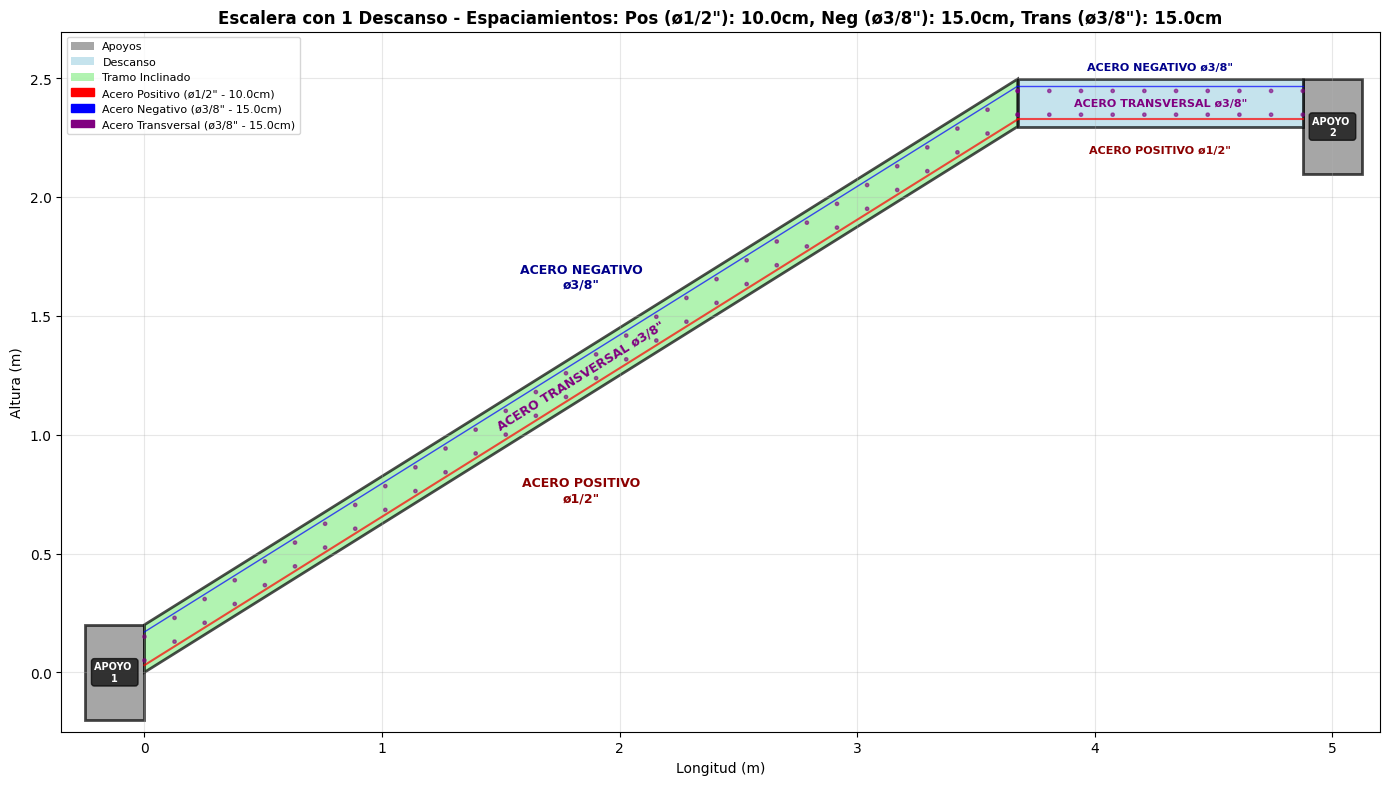


DATOS TÉCNICOS DEL DISEÑO - DIÁMETROS ESPECÍFICOS
Espesor de losa: 20.0 cm
Ángulo de inclinación: 32.0°

ÁREAS DE ACERO CALCULADAS:
• Acero positivo: 8.60 cm²/m
• Acero negativo: 4.17 cm²/m
• Acero transversal mínimo: 3.60 cm²/m

ESPACIAMIENTOS FINALES:
• Positivo (ø1/2"): 10.0 cm
• Negativo (ø3/8"): 15.0 cm
• Transversal (ø3/8"): 15.0 cm

RESUMEN DIÁMETROS:
✓ Acero positivo: Barras de ø1/2" cada 10.0 cm
✓ Acero negativo: Barras de ø3/8" cada 15.0 cm
✓ Acero transversal: Barras de ø3/8" cada 15.0 cm


In [15]:
x = Escalera(CP, P, Lt, e1, e2, Ld, sc, fc, fy, apoyos)
x.graficar_escalera()